ИТ-компания Х требует выделить сегменты клиентов в зависимости от моделей их поведения, чтобы сфокусировать маркетинговую стратегию компании на конкретном сегменте. Маркетинговая команда компании хотела бы использовать AI/ML для запуска целевой маркетинговой рекламной кампании, ориентированной на определенную группу клиентов.
Компания предоставила обширные данные о клиентах банка за последние 6 месяцев в файле формата CSV. Данные включают частоту транзакций, сумму, срок действия и т. д.
«Сегментация маркетинга» имеет решающее значение для максимизации коэффициента конверсии маркетинговой кампании.


Очистка данных

In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

FILEPATH = 'dataset2.csv'
check_path = os.path.isfile(FILEPATH)

# Загружаем данные
def loadData(FILEPATH):
    check_path = os.path.isfile(FILEPATH)
    if check_path:
        return pd.read_csv(FILEPATH)
df = loadData(FILEPATH)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [52]:
# Размерность
df.shape

(8950, 18)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [54]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [55]:
# количество уникальных значений для каждого столбца
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [56]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

При первоначальном открытии набора данных, видно, что два признака имеют присутствуют нулевые и отсутствующие данные. 
Видно, что большинство признаков имеют разброс больше, чем их у других и сильно отличаются друг от другв. Следовательно данные нужно будет нормализовать

Первый признак (CUSTID) можно удалить из исследуемого набора данных потому что все значения в нем уникальны. Основная задача этого признака - это идентифицировать владельца карты, он уникален для каждого владельца.

In [57]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [58]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [59]:
df.isna().mean()*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Видно, что большинство признаков имеют среднее значение намного больше, чем их медиана. Это признак некоторой асимметрии в наборе данных

Проверим количество отсутвующих значений

In [60]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [61]:
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MINIMUM_PAYMENTS,313,3.5
CREDIT_LIMIT,1,0.0


Видно, что в двух столбцах отстутвуют несколько значений. В данном случае можно поступить двумя способами: удалить их или заменить на другие.

Значение кредитного предела имеет всего лишь одну отсутствующую запись, поэтому можно просто её удалить. Это изменение никак не повлияет на конечный результат

In [62]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Что касается признака минимальных платежей, нету ни одного столбца, который имел бы отношение к этому признаку.
Следовательно, можно предположить, что значения отсутствуют случайным образом, и можно просто использовать медиану для замены значений Nan, поскольку распределение минимальных платежей искажено, и, следовательно, медиана дает лучшую оценку центральной тенденции этой характеристики.

In [63]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [64]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [65]:
# Матрица "Объект-объект"
import scipy
from scipy.spatial.distance import pdist, squareform

# Используем коэффициенты корреляции
Y = pdist(df, 'correlation')
Y = squareform(Y) 
Obj_matrix = pd.DataFrame(data = Y)
Obj_matrix

,0,1,2,3,4,5,6,7,8,9,...,8939,8940,8941,8942,8943,8944,8945,8946,8947,8948
0,0.000000,0.339887,0.063482,0.075522,0.195145,0.456731,0.181682,0.208211,0.024115,0.025363,...,0.180056,0.396697,0.007608,0.010823,0.074342,0.044217,0.046014,0.012039,0.016224,0.425381
1,0.339887,0.000000,0.329715,0.383913,0.259733,0.580334,0.475224,0.335110,0.349093,0.375080,...,0.500152,0.073138,0.371834,0.352805,0.454828,0.392494,0.422357,0.390487,0.301968,0.665641
2,0.063482,0.329715,0.000000,0.020796,0.125661,0.457357,0.211490,0.099749,0.018885,0.052843,...,0.278054,0.296977,0.055281,0.053788,0.067813,0.137490,0.152199,0.066059,0.059337,0.328165
3,0.075522,0.383913,0.020796,0.000000,0.226783,0.536875,0.159082,0.181291,0.017141,0.033637,...,0.271842,0.333946,0.053847,0.054149,0.019419,0.134800,0.154355,0.058078,0.067944,0.225483
4,0.195145,0.259733,0.125661,0.226783,0.000000,0.313299,0.330134,0.052264,0.187559,0.249491,...,0.342538,0.329095,0.234873,0.224646,0.317737,0.251358,0.268996,0.258194,0.221471,0.552385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0.044217,0.392494,0.137490,0.134800,0.251358,0.426958,0.136469,0.239996,0.079042,0.077057,...,0.053997,0.475424,0.049669,0.082800,0.123036,0.000000,0.032841,0.043249,0.100712,0.394764
8945,0.046014,0.422357,0.152199,0.154355,0.268996,0.308398,0.185576,0.241635,0.101215,0.105759,...,0.087323,0.496890,0.058184,0.091401,0.130409,0.032841,0.000000,0.051816,0.102781,0.415478
8946,0.012039,0.390487,0.066059,0.058078,0.258194,0.499729,0.192365,0.230223,0.021262,0.021775,...,0.168213,0.402905,0.001289,0.017764,0.053607,0.043249,0.051816,0.000000,0.025487,0.388615
8947,0.016224,0.301968,0.059337,0.067944,0.221471,0.555142,0.235369,0.241994,0.025187,0.023319,...,0.280258,0.329761,0.016859,0.005313,0.073669,0.100712,0.102781,0.025487,0.000000,0.452076


Визуализация данных

Изначально построим распределение и посмотрим на исходные данные

In [66]:
from IPython.core.pylabtools import figsize
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
sns.set(font_scale = 2)

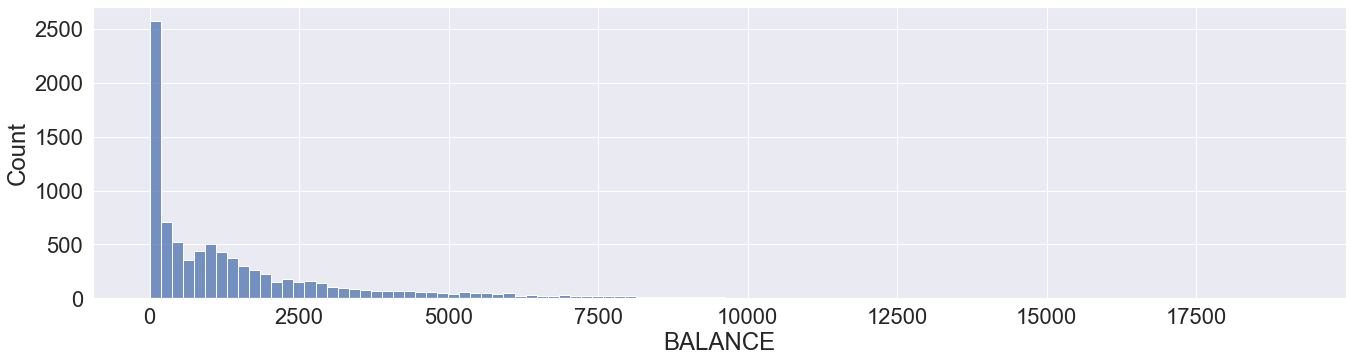

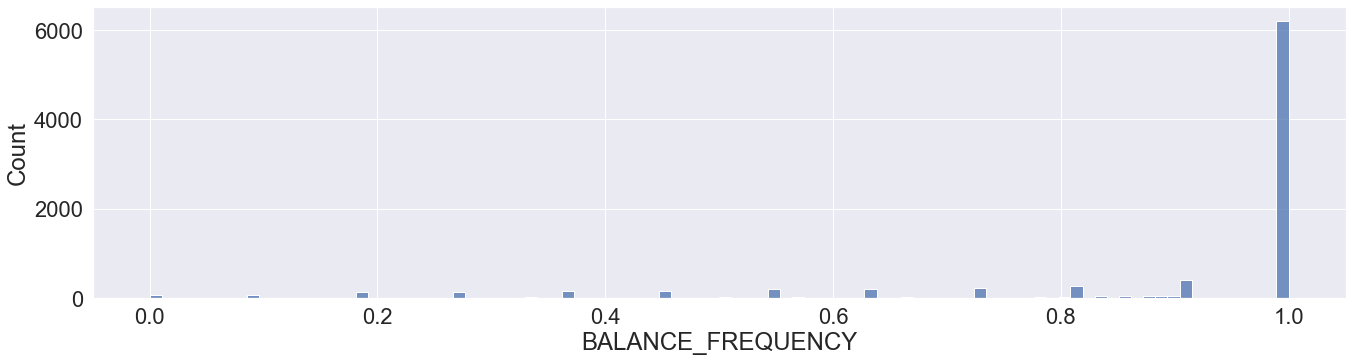

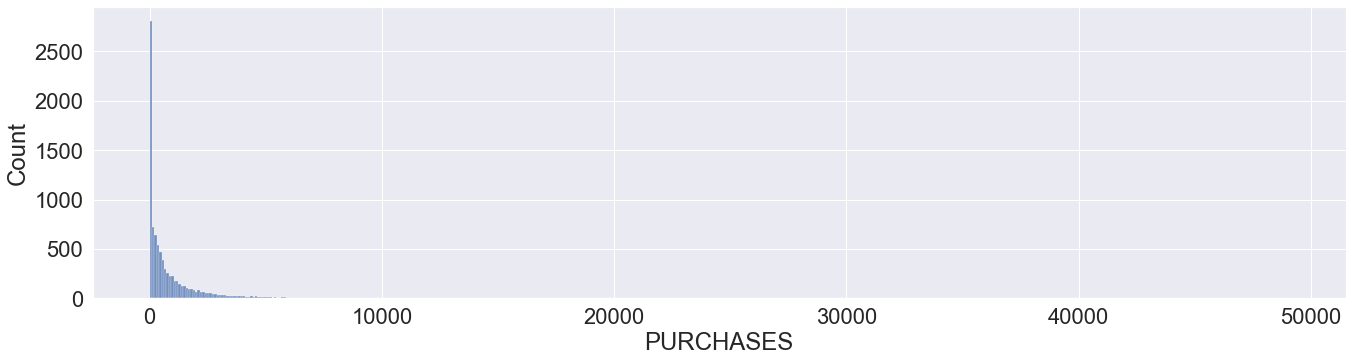

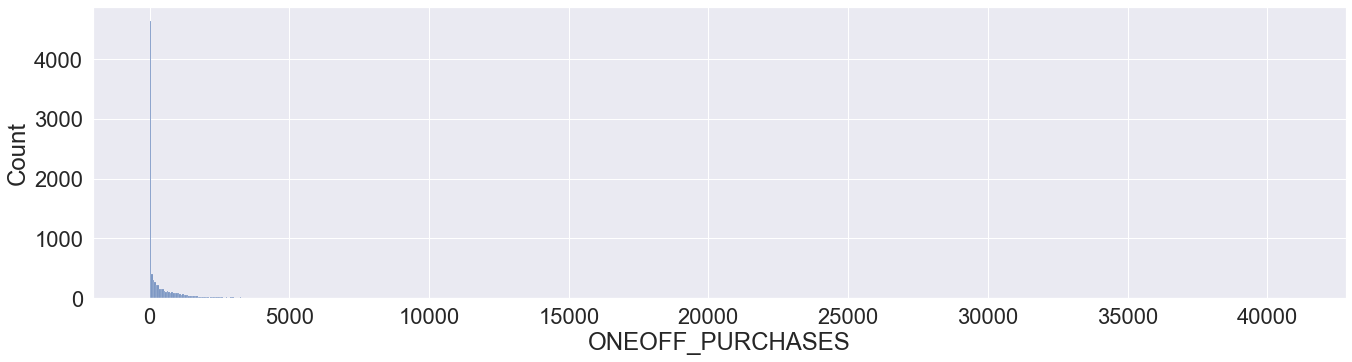

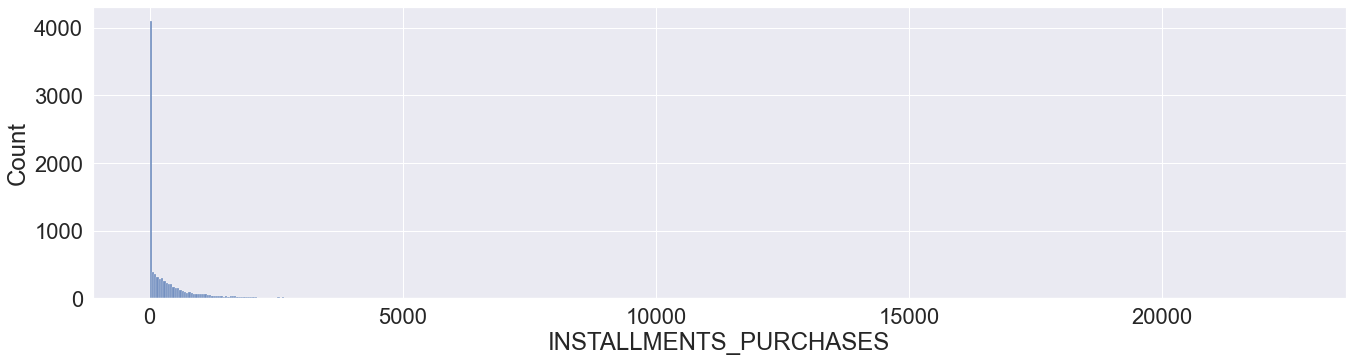

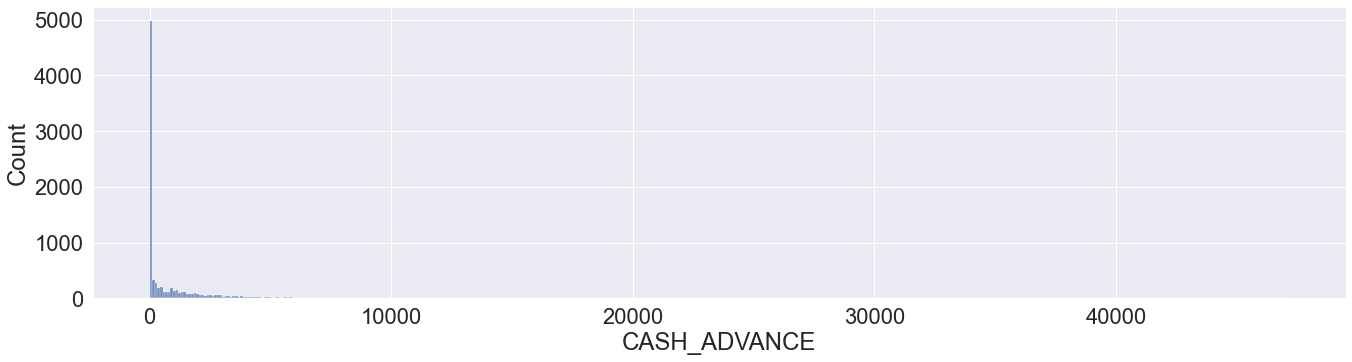

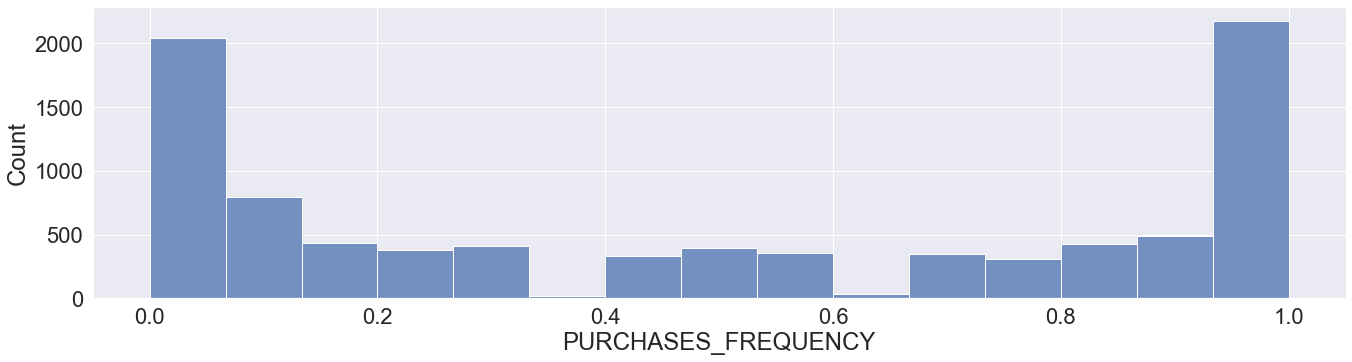

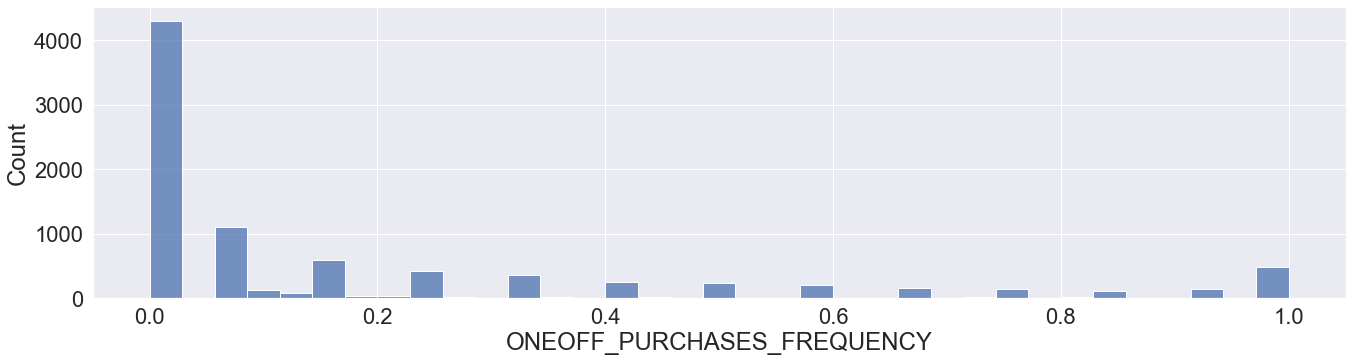

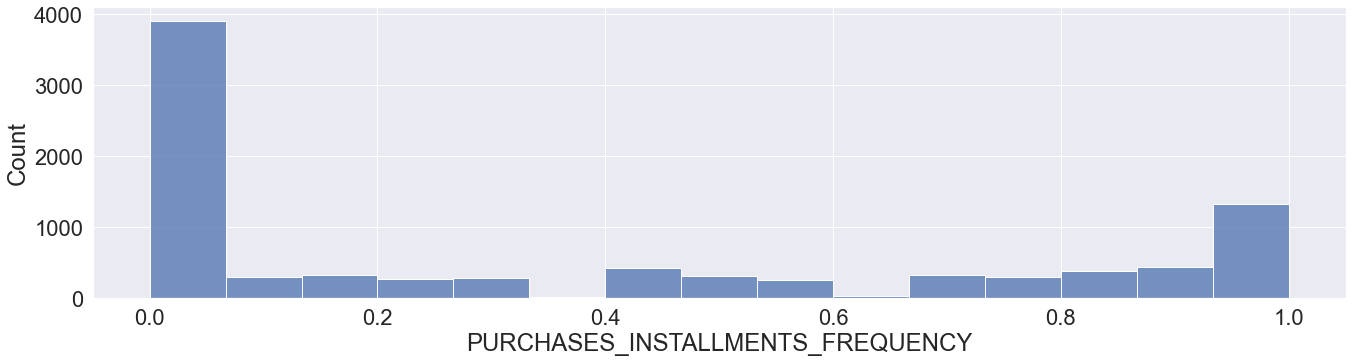

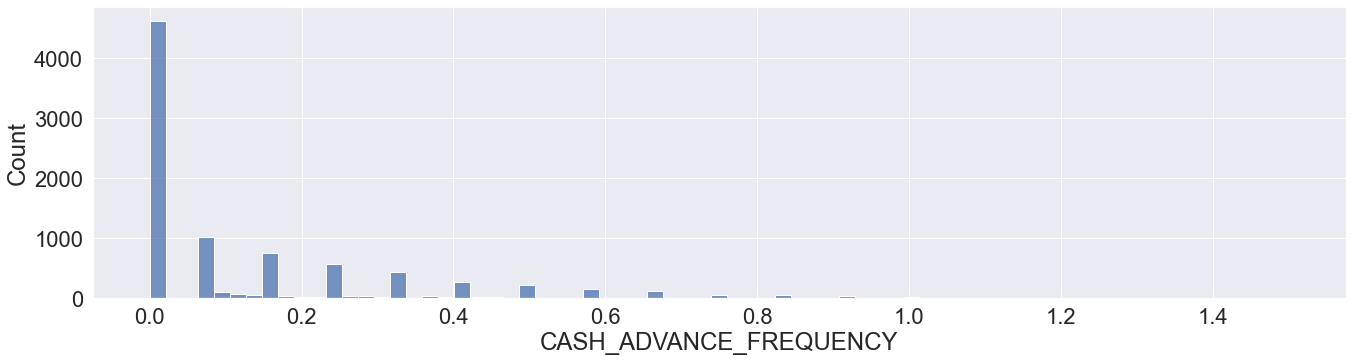

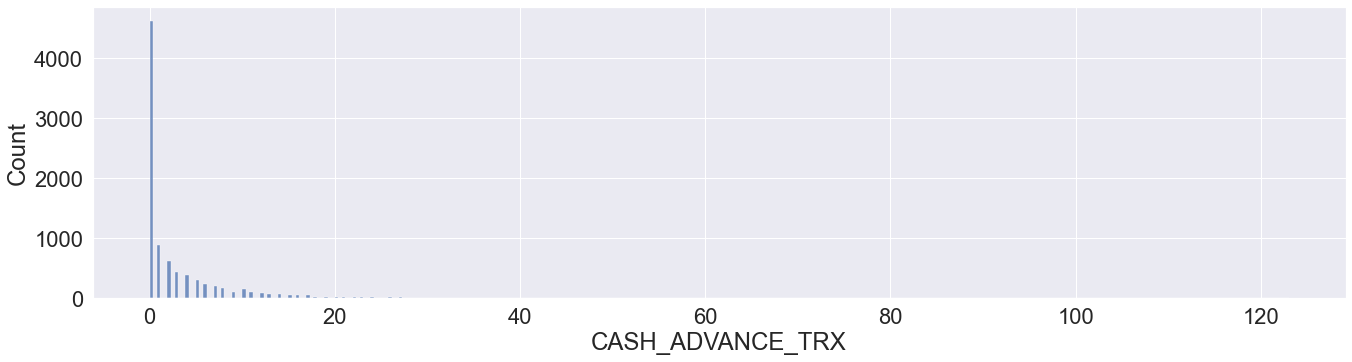

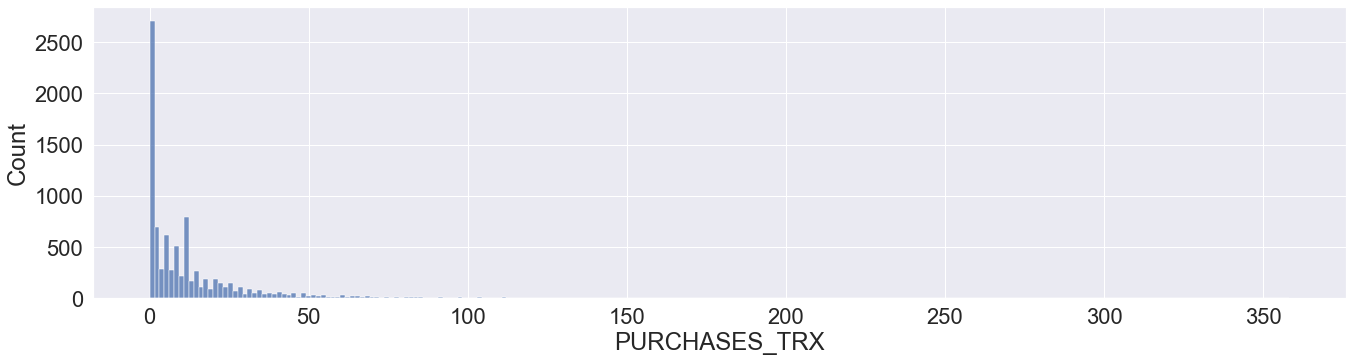

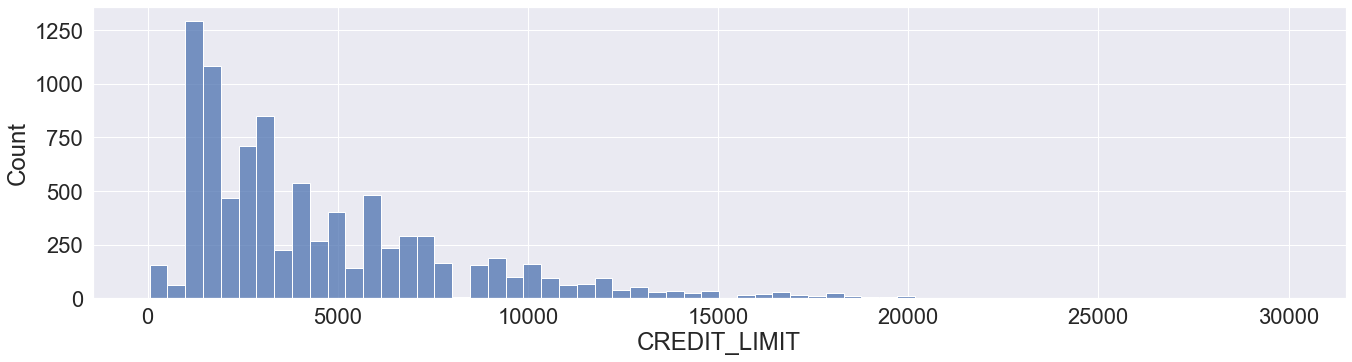

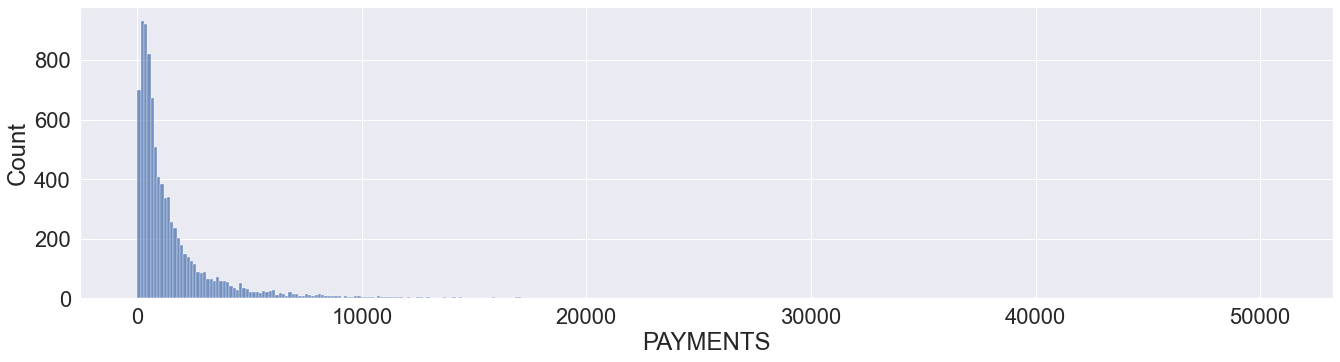

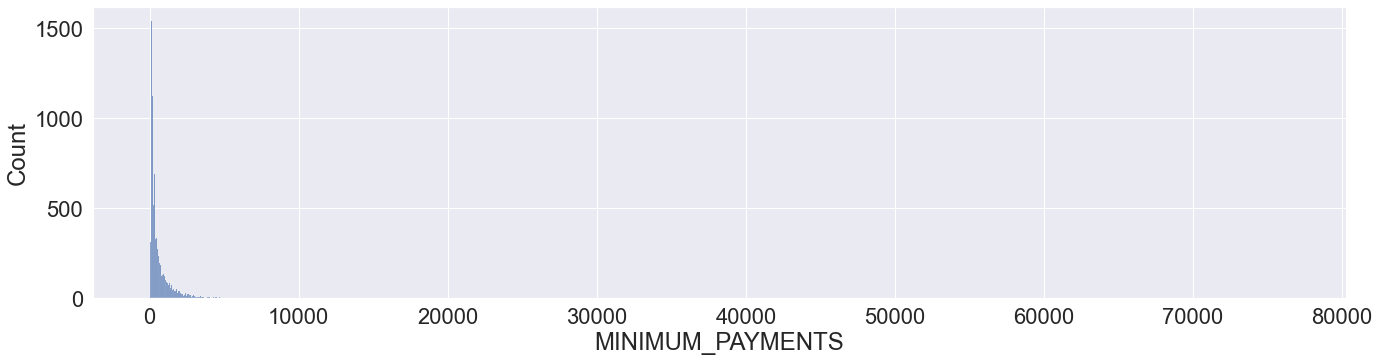

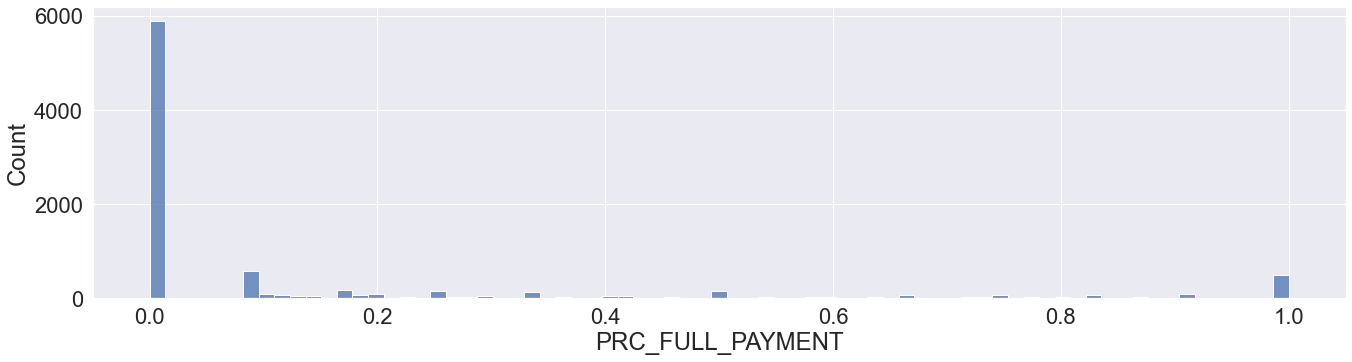

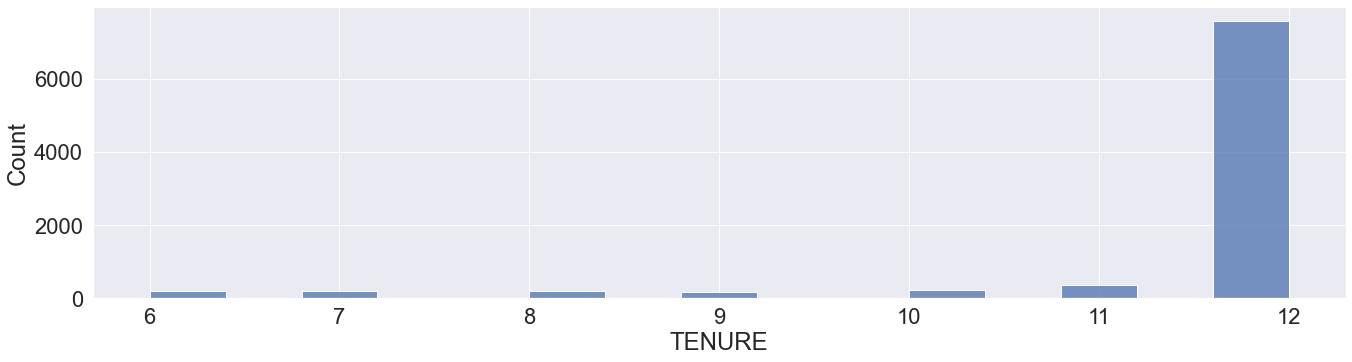

In [67]:
for column in df.columns:
        plt.figure(figsize = (20,5))
        sns.histplot(df[column])
        plt.show()

На основе построенных выше графиков можно сделать следующие выводы:
1. Большинство держателей кредитных карт имеют низкий кредитный лимит и поддерживают кредитный баланс ниже 7500;
2. Признаки, такие как “Покупки”, “одноразовые покупки”, “покупки в рассрочку” и “авансы наличными”, также следуют той же тенденции, что и кредитный баланс. Все они могут быть связаны. То есть, поскольку кредитный баланс невелик, покупки также невелики и так далее (на рисунке 4 представлен пример на основе “Покупок”);
3. Большинство людей либо ничего не покупают, либо покупают очень часто - это видно из признака “Частота покупок”;
4. Людей, которые покупают в рассрочку, больше, чем людей, которые покупают за один раз
5. За последние 6 месяцев большинство людей произвели общие платежи ниже 10000, при этом минимальные платежи были ниже 5000
6. Наконец, большинство держателей кредитных карт владеют картой более 12 месяцев

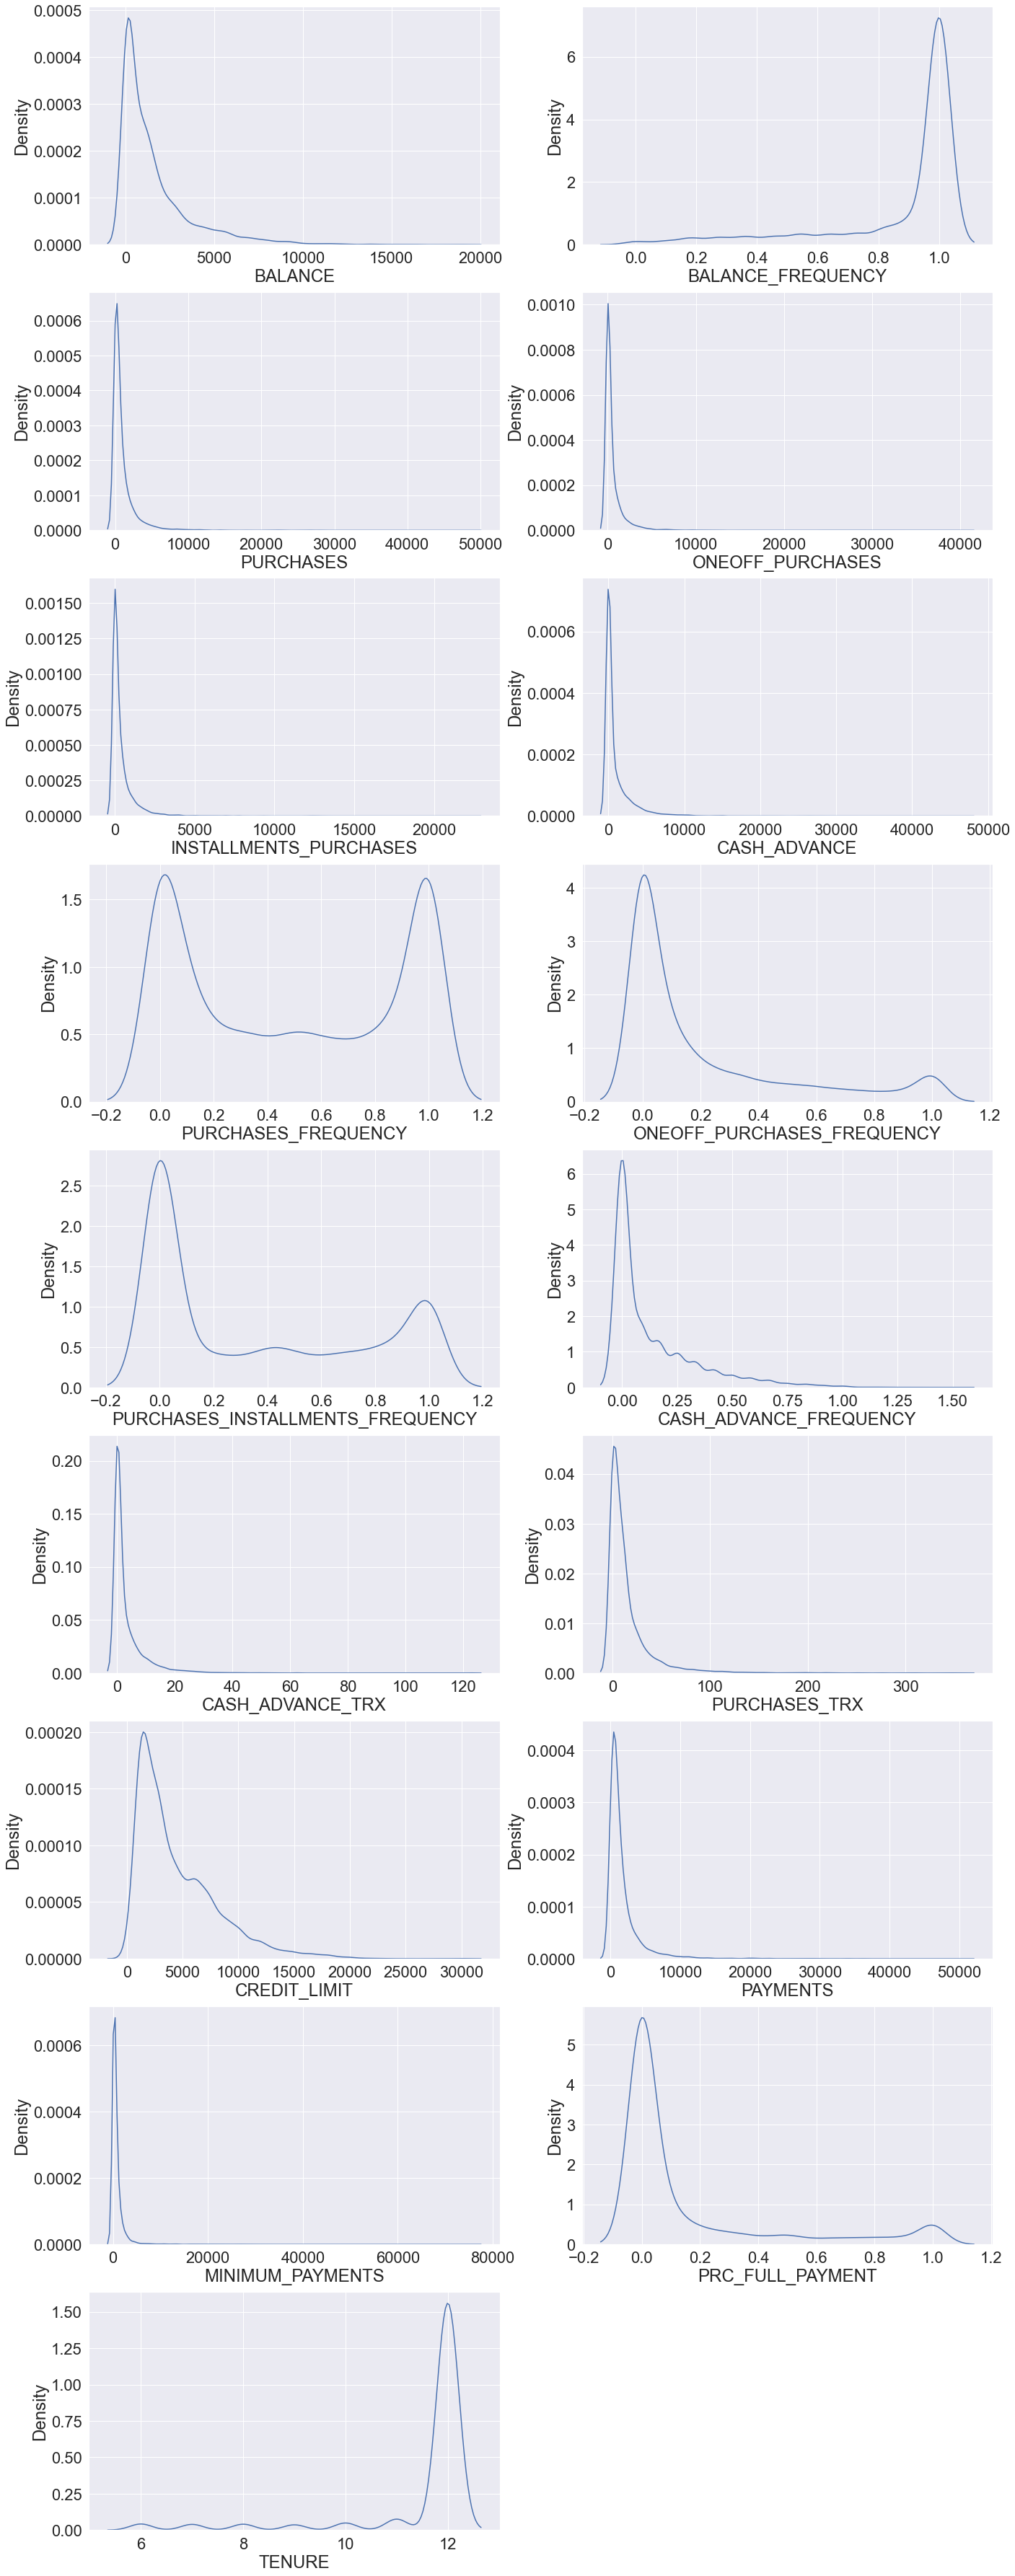

In [68]:
plt.figure(figsize=(20,60))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Неровностей много и они разнообразны. Это ожидаемо от таких наборов данных, поскольку всегда будет несколько клиентов, которые совершают очень большое количество транзакций.

Асимметрию можно как удалить из выборки, так и оставить. Например, если мы хотим выполнить кластеризацию для обнаружения аномолии, в этом случае мы не хотели бы обрабатывать выбросы, поскольку мы хотели бы, чтобы наша модель обнаруживала их и группировала в кластер.
В данном случае, хотелось бы добиться хорошей визуализации, поэтому нужно максимально обработать асимметрию, поскольку это поможет модели формировать лучшие кластеры.

Далее рассмотрим взаимосвязи между и признаками и попробуем увидеть явное образование кластеров

Из ниже приведенного графика видно, что много людей совершают мелкие покупки имея на своем счету сумму. Есть люди готовые набрать часть денег и купить что-то дороже, в рассрочку

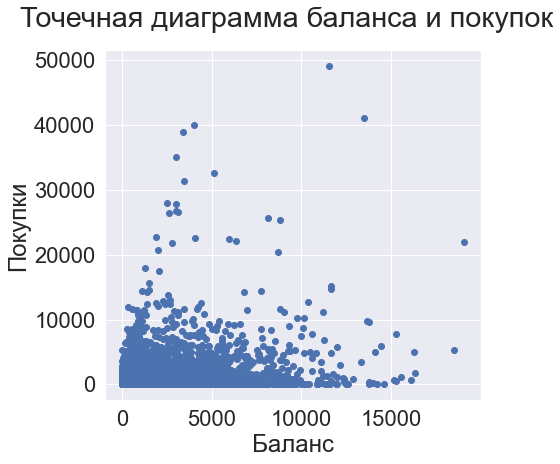

In [69]:
age = df['BALANCE'].tolist()
spending_score = df['PURCHASES'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(age, spending_score)
plt.suptitle("Точечная диаграмма баланса и покупок")
plt.xlabel("Баланс")
plt.ylabel("Покупки")
plt.show()

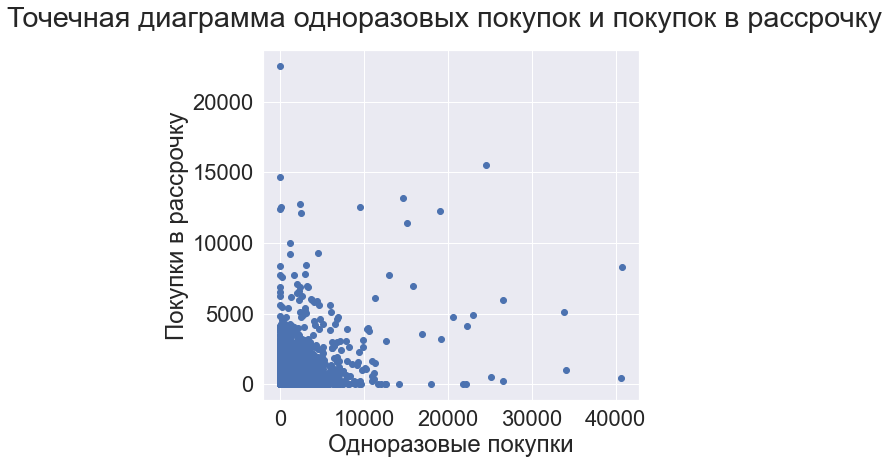

In [70]:
age = df['ONEOFF_PURCHASES'].tolist()
annual_income = df['INSTALLMENTS_PURCHASES'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(age, annual_income)
plt.suptitle("Точечная диаграмма одноразовых покупок и покупок в рассрочку")
plt.xlabel("Одноразовые покупки")
plt.ylabel("Покупки в рассрочку")
plt.show()

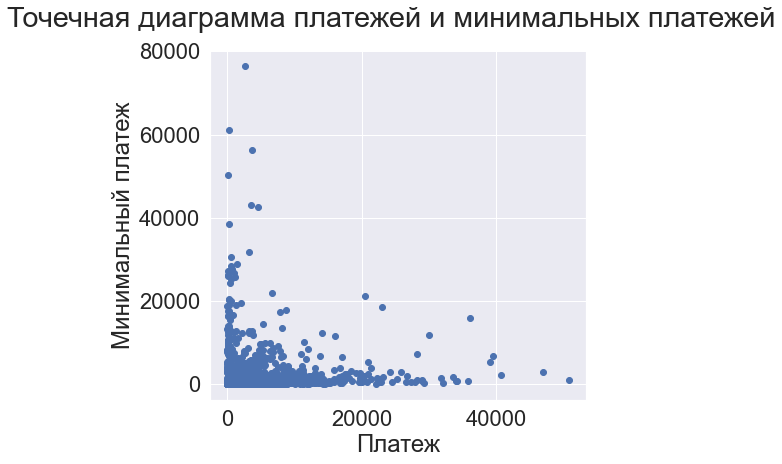

In [71]:
annual_income = df['PAYMENTS'].tolist()
spending_score = df['MINIMUM_PAYMENTS'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(annual_income, spending_score)
plt.suptitle("Точечная диаграмма платежей и минимальных платежей")
plt.xlabel("Платеж")
plt.ylabel("Минимальный платеж")
plt.show()

Явных кластеров обнаружить не удалось, следовательно попробуем исследовать оставшиеся признаки и впоследствии при помощи метода кластеризации их сформировать

Text(0, 0.5, 'Кредитный предел')

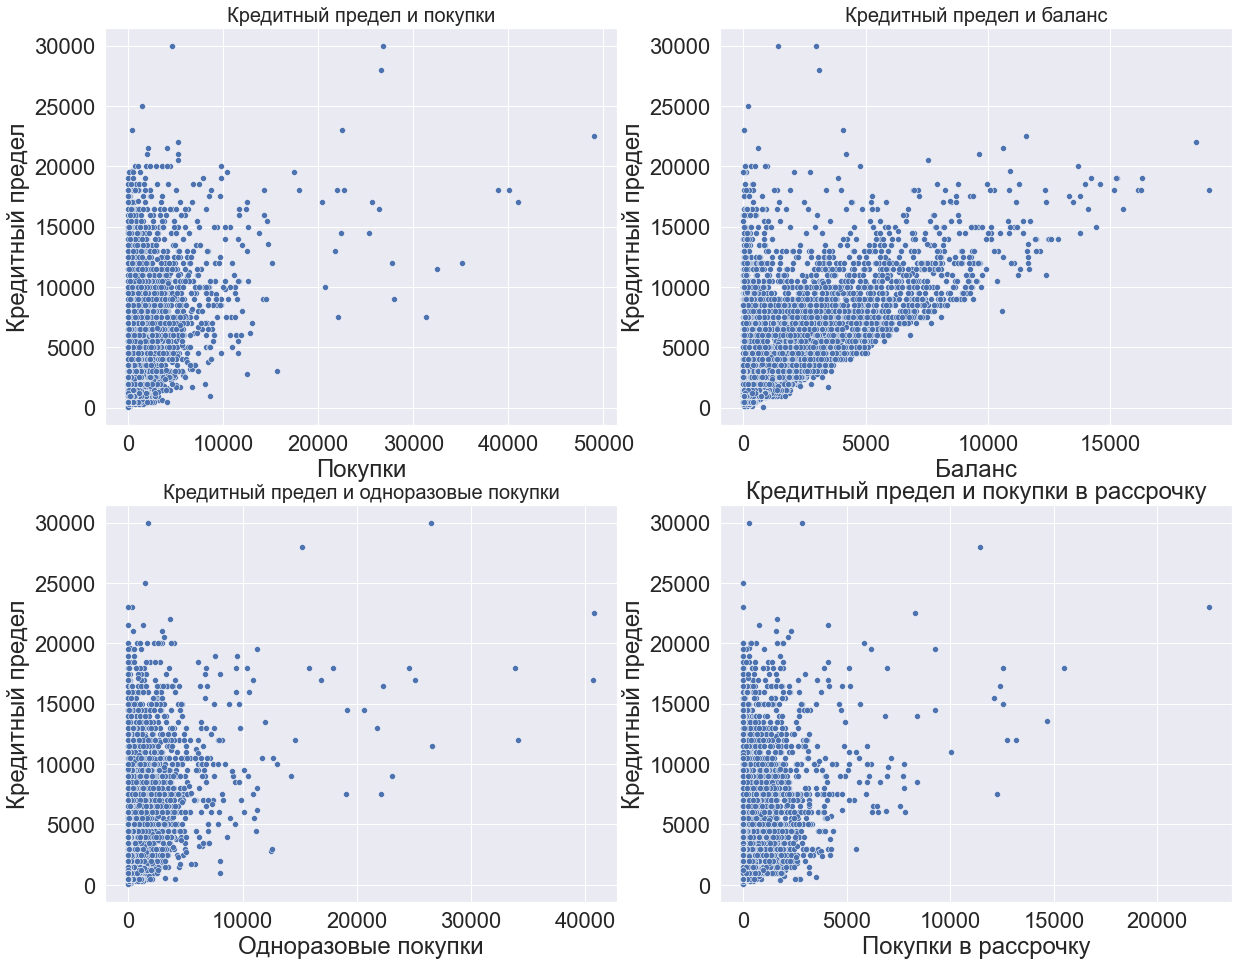

In [72]:
plt.rcParams['figure.figsize'] = (18,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Кредитный предел и покупки', fontsize =20)
plt.xlabel('Покупки')
plt.ylabel('Кредитный предел')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Кредитный предел и баланс', fontsize =20)
plt.xlabel('Баланс')
plt.ylabel('Кредитный предел')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Кредитный предел и одноразовые покупки', fontsize =20)
plt.xlabel('Одноразовые покупки')
plt.ylabel('Кредитный предел')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Кредитный предел и покупки в рассрочку')
plt.xlabel('Покупки в рассрочку')
plt.ylabel('Кредитный предел')

Ожидается, что покупки вырастут, когда увеличится кредитный лимит.
В конце концов, зачем покупать кредитную карту с высоким лимитом, если вы не планируете ее использовать, но графики показывают другую историю. Следовательно, нет сильной корреляции между кредитным пределом и этими переменными. На самом деле сумма покупок, как правило, остается на нуле, а кредитный лимит увеличивается. 
Это снова, показывает, что пользователи кредитных карт действительно хотят, чтобы их баланс был низким, чтобы использовать свой кредит. Это может означать, что для большинства людей кредитные карты являются инструментом использования кредита, а не средством их траты.

Что касается баланса,
кажется, что существует лучшая корреляция, что по мере увеличения кредитного предела баланс также увеличивается, но также ясно видно, что есть также точки, где баланс остается равным нулю, но кредитные лимиты растут.

Графики ниже помогут определить смещение частот

Text(0.5, 0, 'Частота выдачи наличных')

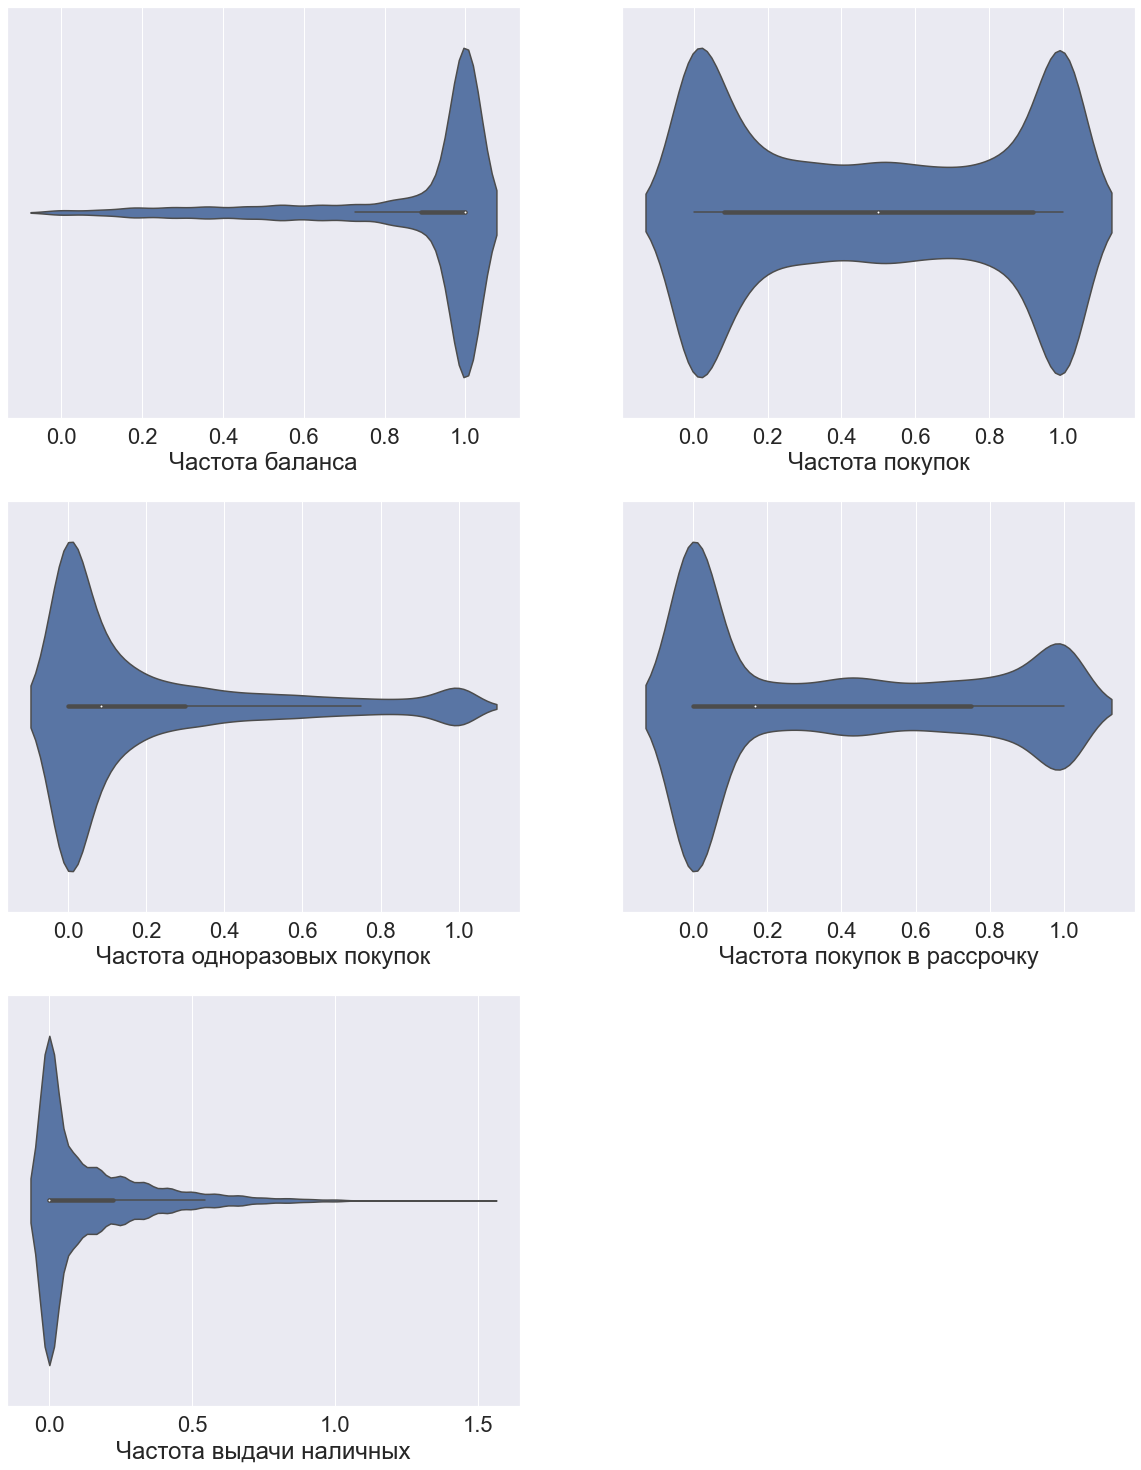

In [73]:
plt.rcParams['figure.figsize'] = (18,24)

plt.subplot(3,2,1)
sns.violinplot(df['BALANCE_FREQUENCY'])
plt.xlabel('Частота баланса')

plt.subplot(3,2,2)
sns.violinplot(df['PURCHASES_FREQUENCY'])
plt.xlabel('Частота покупок')

plt.subplot(3,2,3)
sns.violinplot(df['ONEOFF_PURCHASES_FREQUENCY'])
plt.xlabel('Частота одноразовых покупок')

plt.subplot(3,2,4)
sns.violinplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.xlabel('Частота покупок в рассрочку')

plt.subplot(3,2,5)
sns.violinplot(df['CASH_ADVANCE_FREQUENCY'])
plt.xlabel('Частота выдачи наличных')

Этот набор данных включает в себя различные оценки частоты (0–1), которые говорят о частоте использования каждой переменной для каждой точки данных, где 0 — это самая низкая оценка, а одна — самая высокая оценка. Думаю, было бы интересно составить их карту и проанализировать.


Начиная с балансовой частоты. Это измерение того, как часто люди обновляют свой баланс. Как видно, очень большое количество людей набирает около одного балла, что означает, что люди действительно часто обновляют свой баланс.
Как видно было ранее, у держателей кредитных карт есть тенденция поддерживать баланс на низком уровне для использования кредита. Тот факт, что многие люди получают такие высокие баллы, может быть связан с тем, что эти люди часто погашают свой кредит, чтобы поддерживать низкий или даже нулевой баланс.
Далее у нас есть частота покупок или как часто люди совершают покупки. Кажется, что одинаковое количество людей набирает низкие и высокие баллы. Это говорит о том, что существует равное количество людей, которые часто покупают с помощью своих кредитных карт, и такое же количество людей, которые делают это редко.
Это интересный вывод, поскольку, когда ранее из распределения баланса, было видно, что людей с нулевым или низким балансом намного больше, чем людей с высоким балансом. Если есть равное количество людей, которые покупают часто, и людей, которые этого не делают, тогда ожидается, что распределение баланса будет иметь как низкое, так и высокое число. С другой стороны, был ранее видно, из-за высокой частоты баланса, что, возможно, люди действительно хорошо расплачиваются по своим кредитным картам.
Сравнивая частоту разовой покупки и частоту покупки в рассрочку, видно, что большинство людей имеют около нуля баллов, что означает, что люди редко покупают вообще. Глядя на людей, которые это делают, мы видим, что есть больше людей с более высоким показателем частоты рассрочки, чем у разовой покупки.
Это означает, что люди предпочитают покупать в рассрочку чаще, чем единовременно.

Частота выдачи наличных говорит о том, как часто люди получают аванс наличными, и, как видно, большинство людей набирает около нуля, что означает, что они не получают авансы наличными часто.

Text(0.5, 0, 'Покупки')

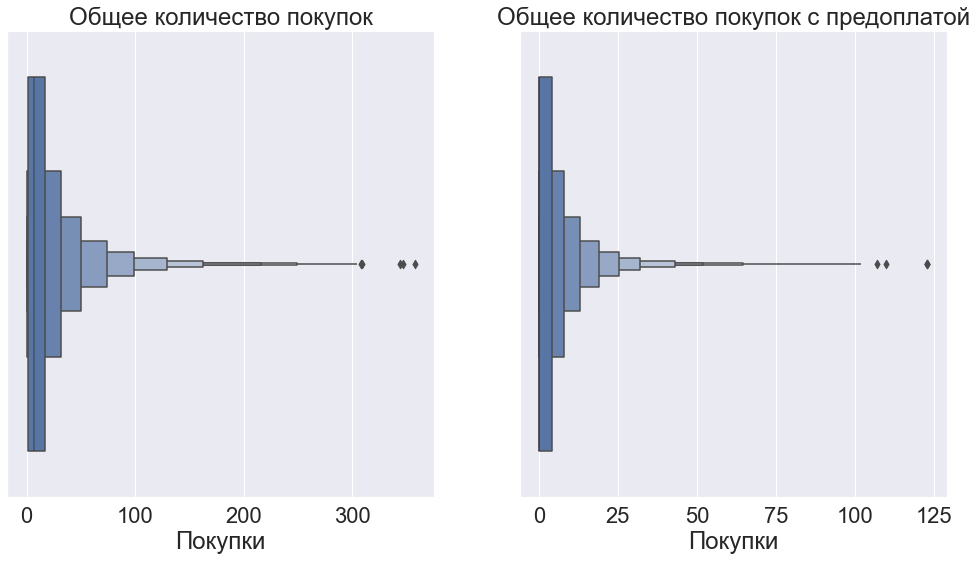

In [74]:
#ONE for purchase TRX, cash advance trx
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(df['PURCHASES_TRX'])
plt.title('Общее количество покупок')
plt.xlabel('Покупки')

plt.subplot(1,2,2)
sns.boxenplot(df['CASH_ADVANCE_TRX'])
plt.title('Общее количество покупок с предоплатой')
plt.xlabel('Покупки')

Выше представлены графики показывают общее количества покупок и покупок, совершенных за наличные.

Как и следовало ожидать к настоящему времени, существует большое количество людей с небольшим количеством транзакций, поскольку исходя из того, что люди используют кредитную карту для получения кредита, а не для покупок.
И есть только несколько человек, покупающих в больших количествах. Некоторые люди покупают более 300 раз, и меньше людей совершают более 100 покупок с выдачей наличных.

Text(0.5, 0, 'Месяцев')

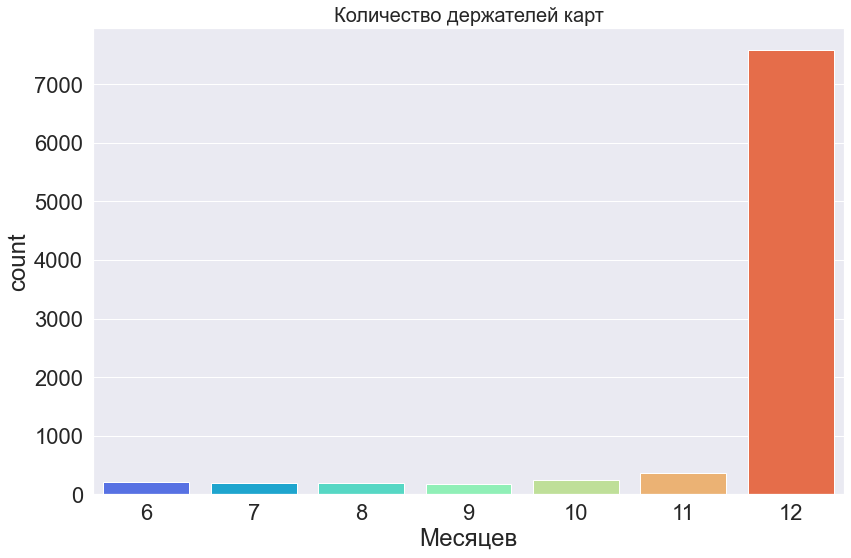

In [75]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['TENURE'], palette='rainbow')
plt.title('Количество держателей карт', fontsize = 20)
plt.xlabel('Месяцев')

Срок погашения карты составляет от 6 до 12 месяцев. Интересно, что большинство карт рассчитаны на 12 месяцев. Чем дольше ваш срок пребывания в должности, тем больше процентная ставка, которую вы платите, но также и тем больше времени, которое у вас есть, чтобы вернуть деньги, и, похоже, это вариант, на который идут люди.

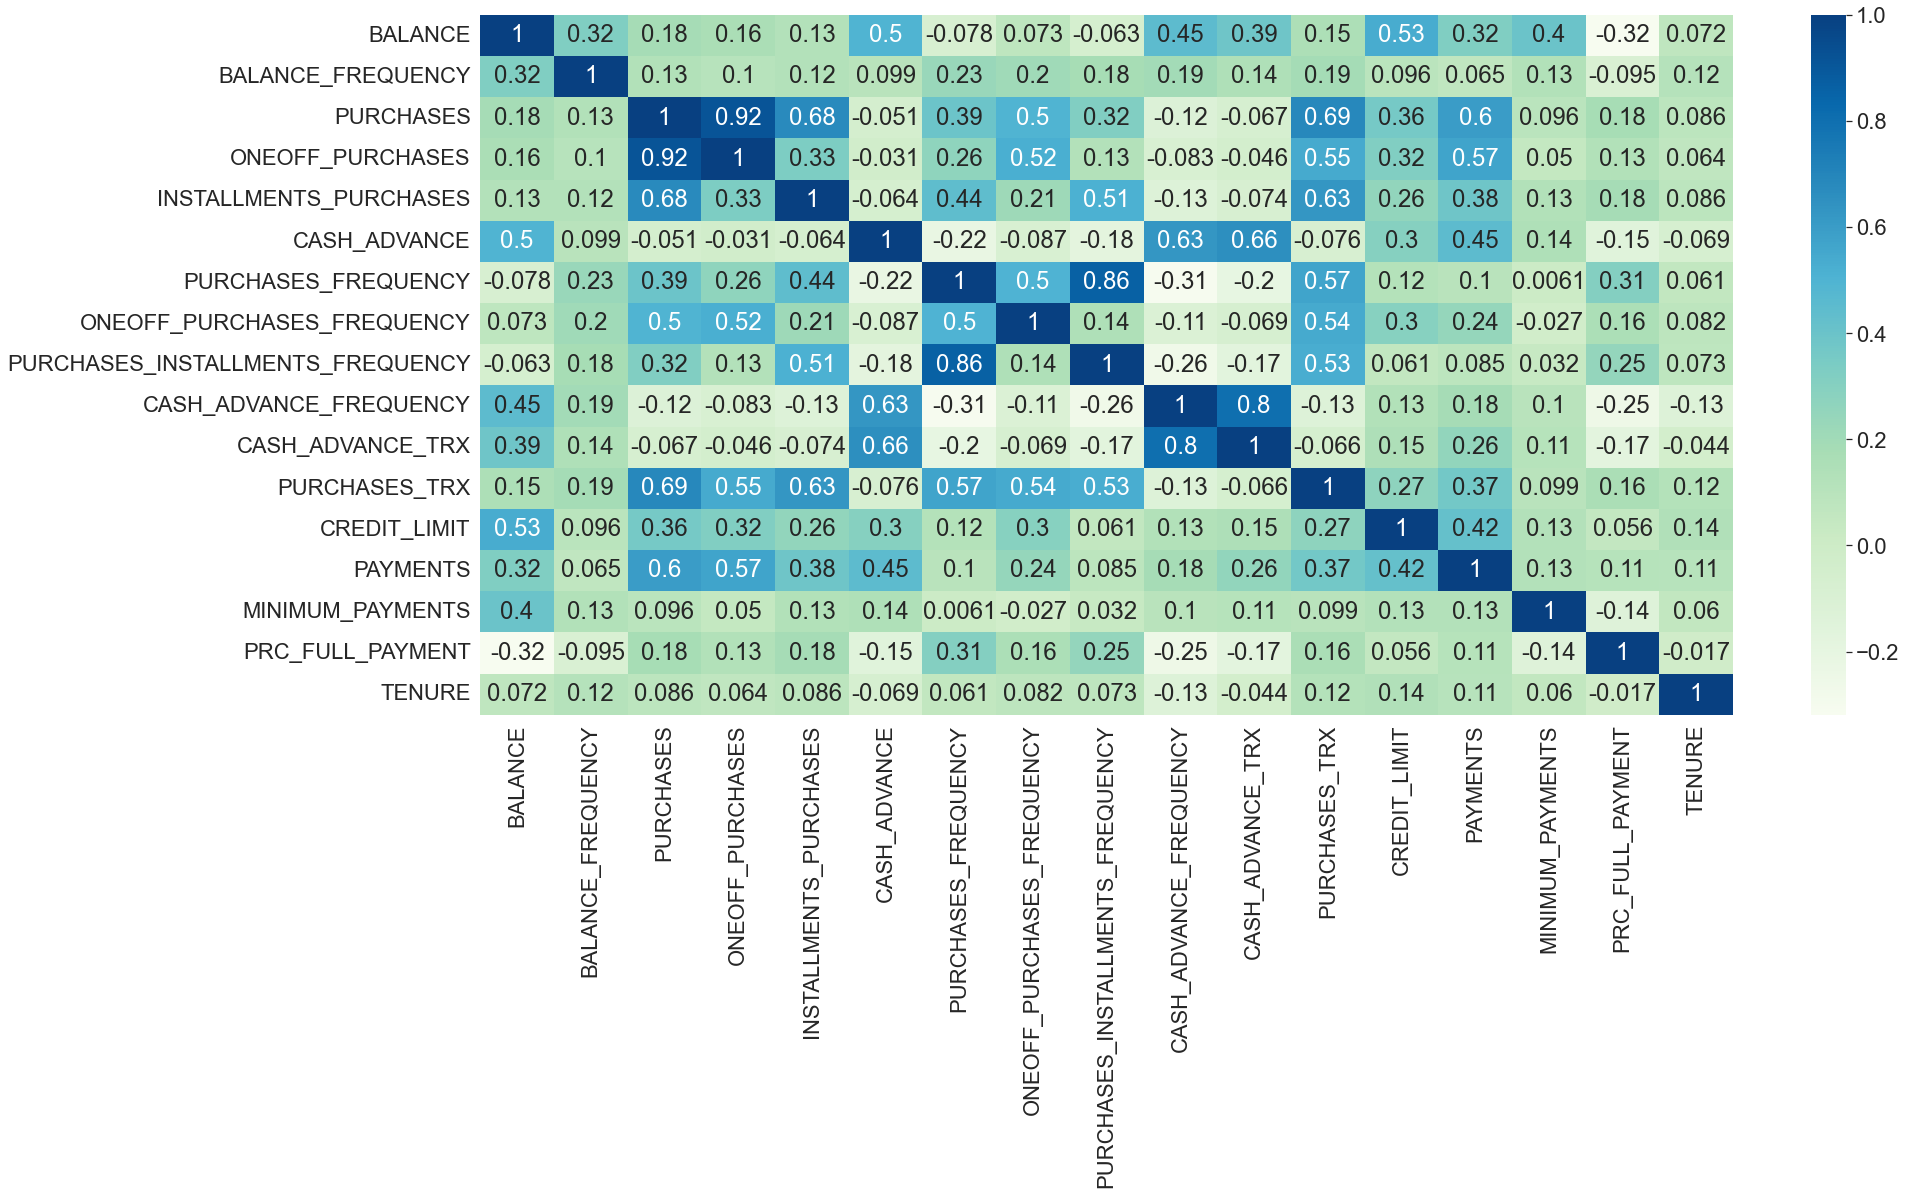

In [76]:
plt.figure(figsize=(25,12))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True, mask=None, cmap='GnBu')
plt.show()

Выше представлена тепловая карта набора данных.

Здесь можно более подробно рассмотреть корреляцию с в наборе данных. Покупки и разовые покупки имеют очень высокую корреляцию, как и следовало ожидать, 0,92. То же самое относится и к переменным и их счетчикам частоты, таким как trx выдачи наличных и частота выдачи наличных на уровне 0,8.
Неудивительно, что такие вещи, как баланс и платежи, имеют плохую корреляцию. Это говорит нам о том, что данные имеют смысл.

In [77]:
df.shape

(8949, 17)

Теперь необходимо отобрать часть признаков и использовать их в дальнейшем. Как было видно раньше, люди меньше берут деньги наличными, чаще расплачиваются кредиткой. Поэтому, чтобы избежать возможного шума в данных попробуем убрать столбцы, которые отвечают за наличные - это CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX. 

В том числе удалим признак частоту пополнения баланса, потому что очевидно, люди часто пополняют свой баланс, следовательно в качестве исследования данные могут ничего не принести, а наоборот даже запутать.


In [78]:
# Select Annual Income and Spending Score as our features
features = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
               'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
               'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]

# Transform features to list
data = features.values
data.shape

(8949, 12)

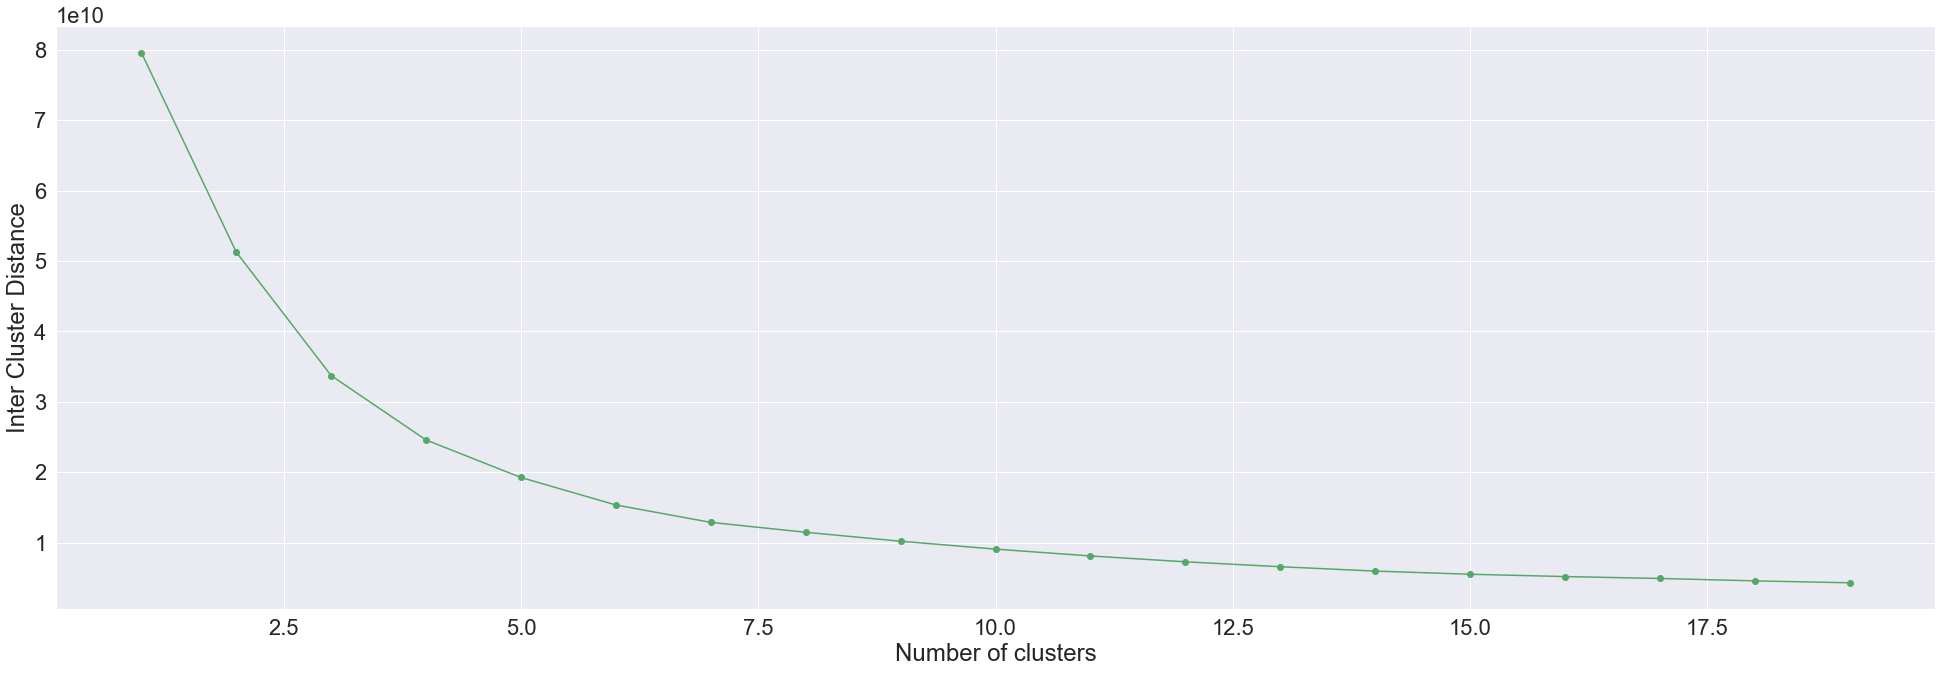

In [79]:
from sklearn.cluster import KMeans
X = df[['BALANCE','PURCHASES']].to_numpy()
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(X)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='g')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

Так как планируется использовать линейную SOM топографию, то понадобится определить приблизительное количество кластеров. График, изображающий метод локтя, используется для поиска кластеров с оптимальным числом с использованием анализа. 

Здесь оптимальное количество кластеров — 4 кластера, поскольку это место, где график начинает сглаживаться, а это означает, что большее количество кластеров не даст более подходящего результата.

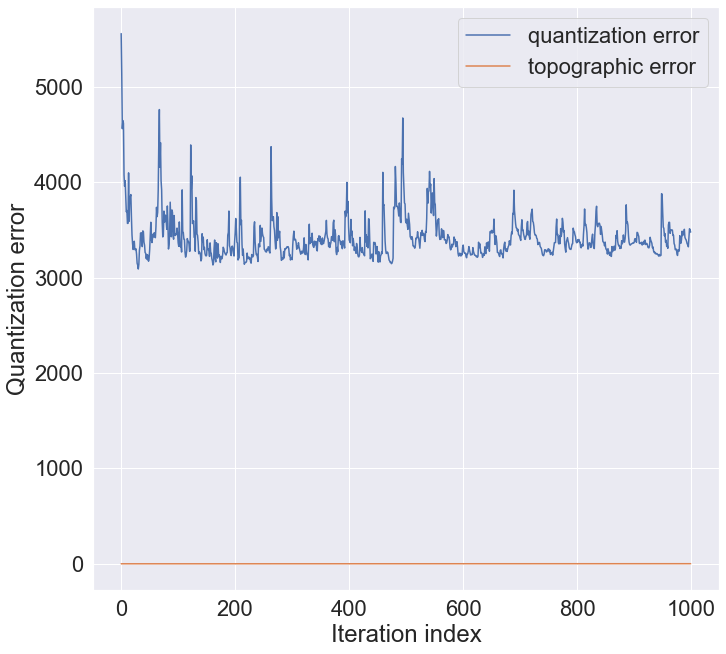

In [80]:
som_shape = (1, 4)

som = MiniSom(som_shape[0], som_shape[1], input_len=12, sigma=0.25, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

plt.figure(figsize=(10, 10))
for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

Ошибка квантования в самоорганизующихся картах с относительно простой функциональной архитектурой могут быть эффективно использованы в качестве индикатора для быстрого автоматического обнаружения систематических и потенциально значимых изменений изображений из больших временных рядов, хотя и с четкими ограничениями. 

Индикатор будет надежно сигнализировать об изменении в ситуациях, когда потенциально критическая информация
удалены из сцены или добавления к ней, но не будут сигнализировать об изменении, когда относительное и общее количество
информация постоянна, но пространственное положение контрастного элемента в сцене изменяется.

Эта ошибка колеблется в одном и том же диапазоне и сильно не изменяется - это говорит о том, что все критические важные данные имеются. А топографическая ошибка на нуле в течение всех итерация, следовательно проблемные (отрицательные, нулевые или отсутствующие) данные отсутствуют в выборке

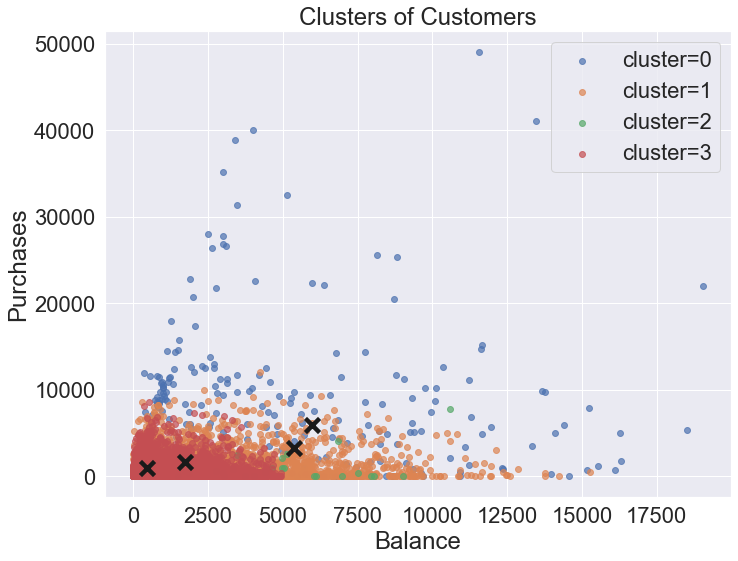

In [81]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.title("Clusters of Customers")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.legend()

Точечная диаграмма баланса и покупок, разделенных по кластерам и отображаемыми центроидами

Здесь видно, что кластер 1 — это люди с высокими расходами и наибольшим балансом, в то время как кластер 0 — это люди с более высоким балансом, но не такие большие траты. Кластер 2,3 — это люди, которые не тратят так много и имеют относительно более низкий баланс (до нуля).

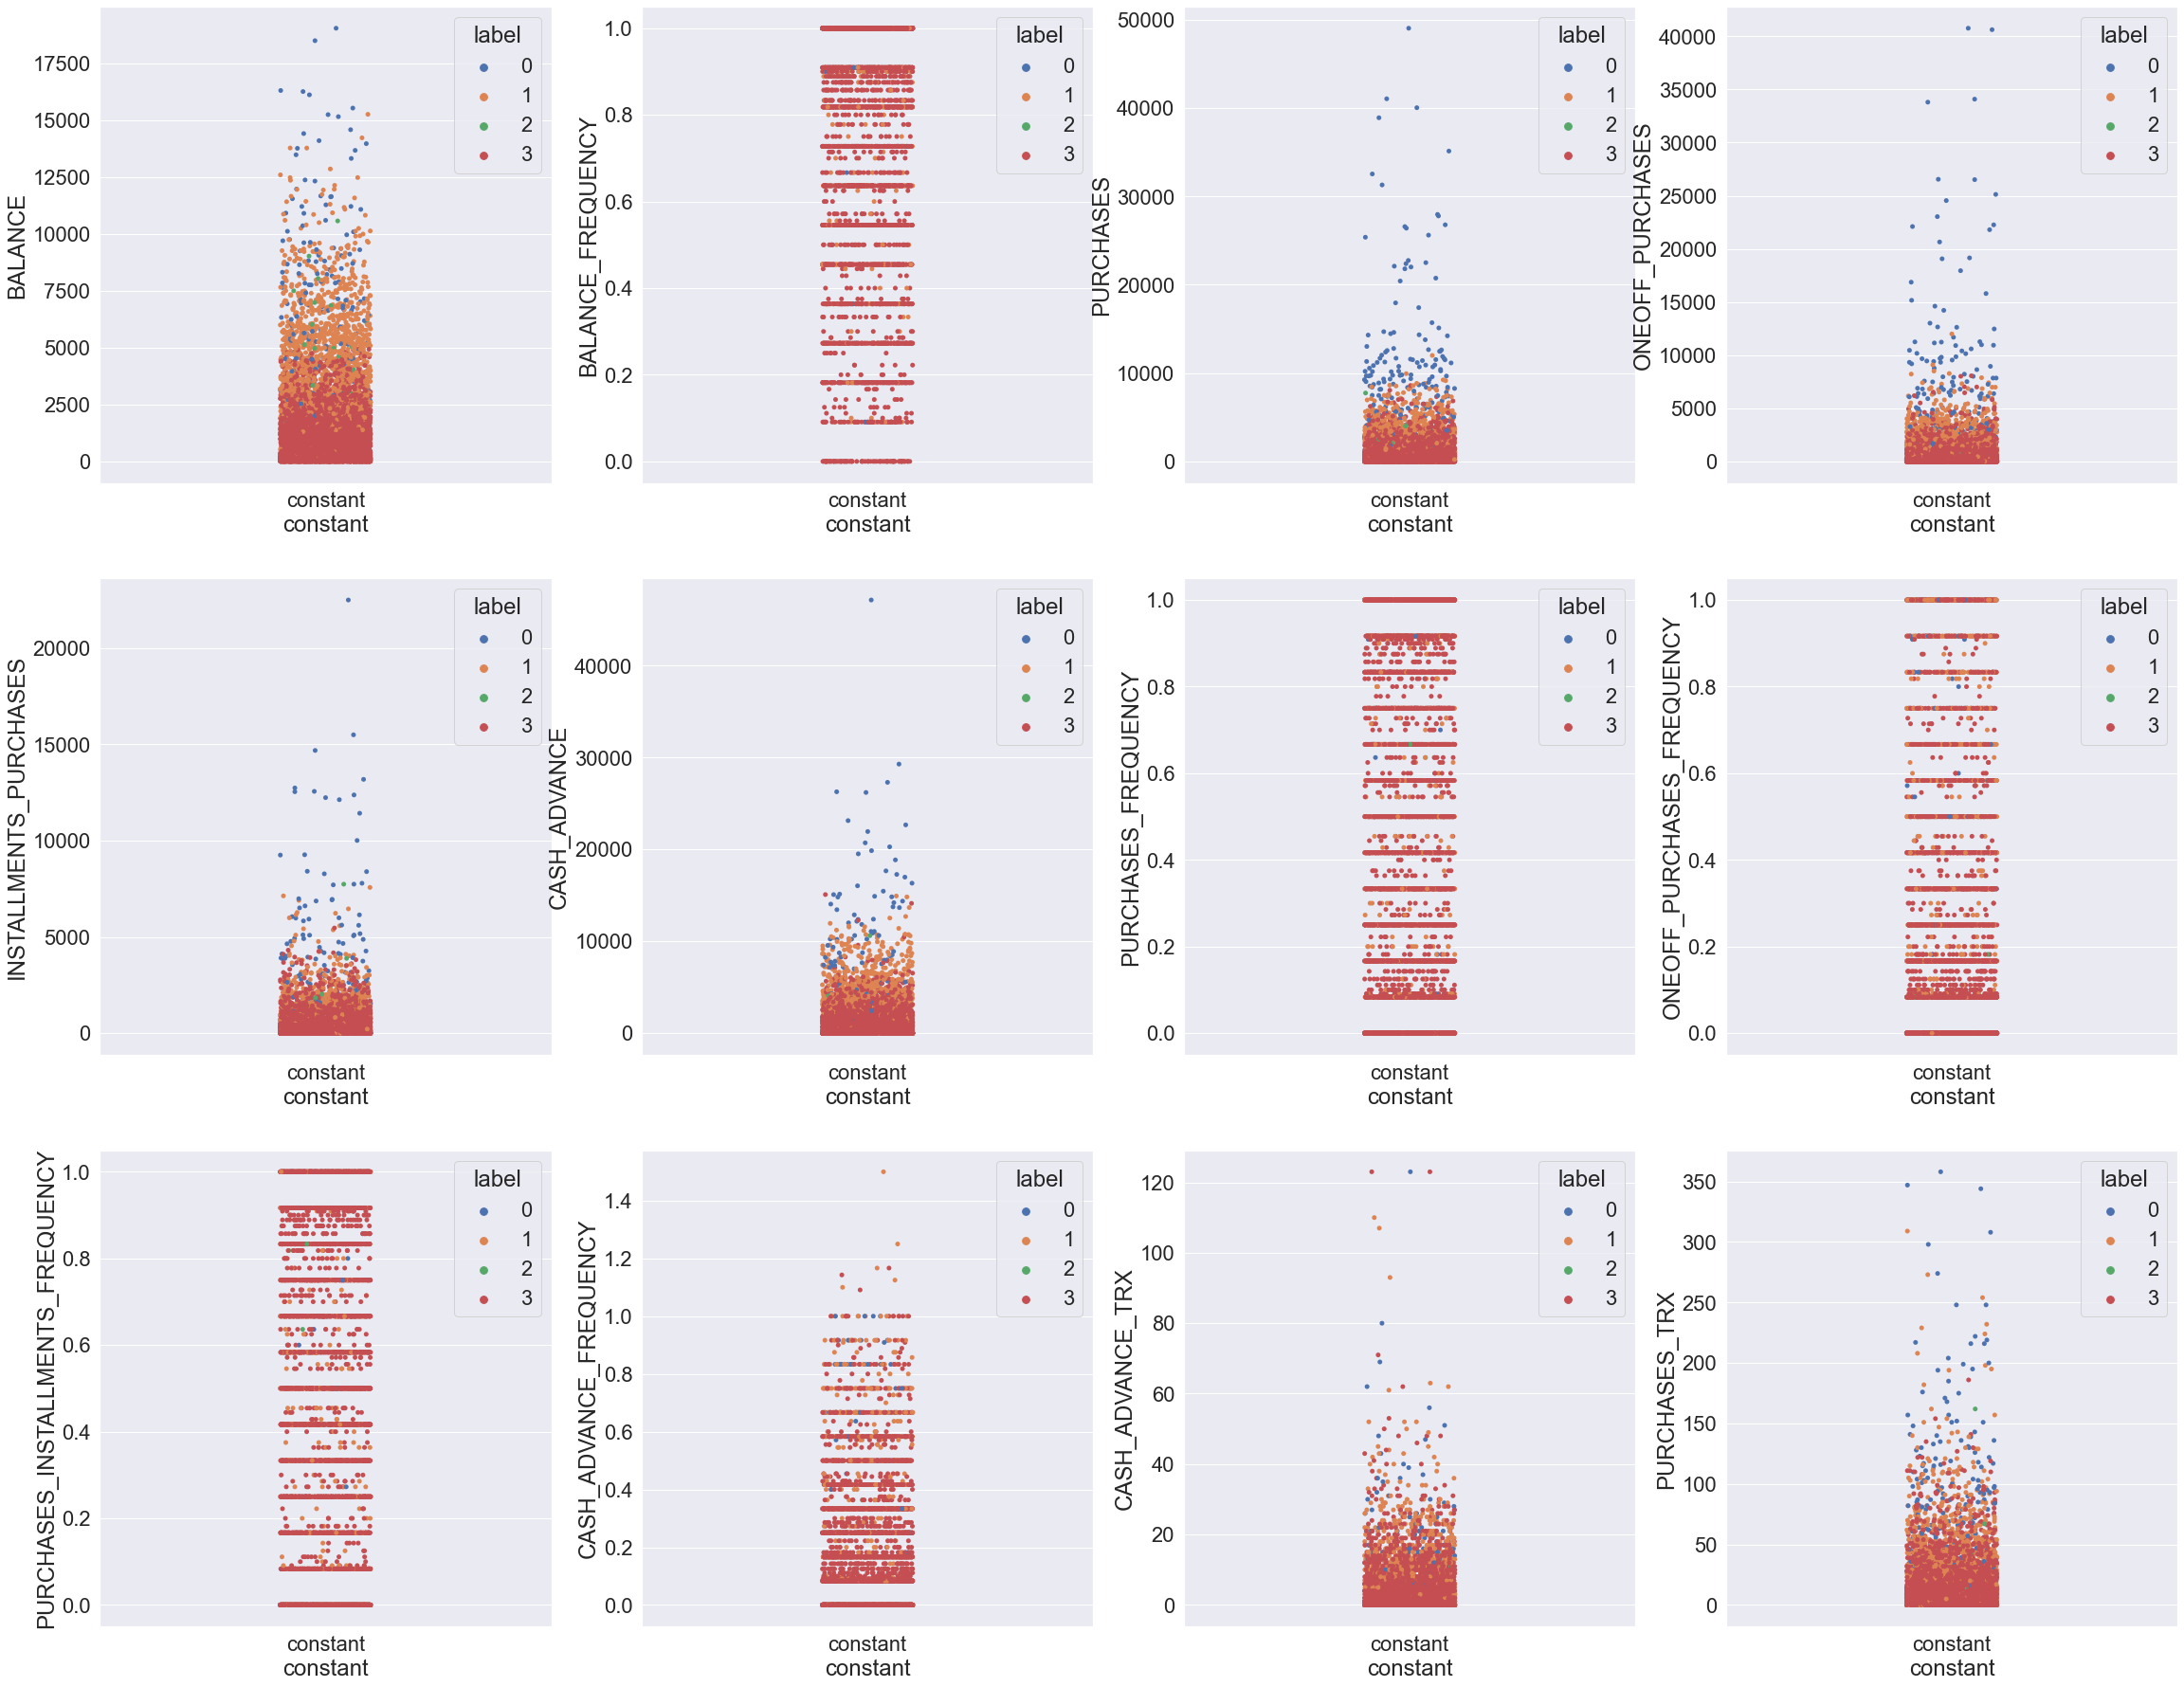

In [82]:
import warnings
warnings.filterwarnings('ignore')

df['label'] = cluster_index
df['constant'] = 'constant'

plt.rcParams['figure.figsize'] =(35,50)

for num in range(0,12):
    ax = plt.subplot(5,4,num+1)
    col = df.columns[num]
    sns.stripplot(df['constant'],df[col], ax=ax, hue=df['label'])
    plt.xlabel('constant')

Здесь показано визуальное представление различных кластеров в виде ленточных графиков.

С первого взгляда становится ясно, что 4 кластера разделяют пользователей кредитных карт на группы, где люди основаны на том, насколько велики их покупки и баланс. Возьмем несколько примеров и рассмотрим их подробнее.

Например, глядя на баланс, люди делятся на 4 группы. Кластер 0 имеет самый высокий баланс, за ним следует кластер 1, а затем кластеры 2,3 находятся внизу. То же самое касается покупок. В кластере 1 самая высокая покупка, за которой следуют кластеры 0, 2, 3 по порядку.

Кластер 1 = самые высокие расходы, кластер 2 = средние расходы, кластер 2 = низкие расходы,
кластер 3 = нулевой баланс и низкий уровень расходов

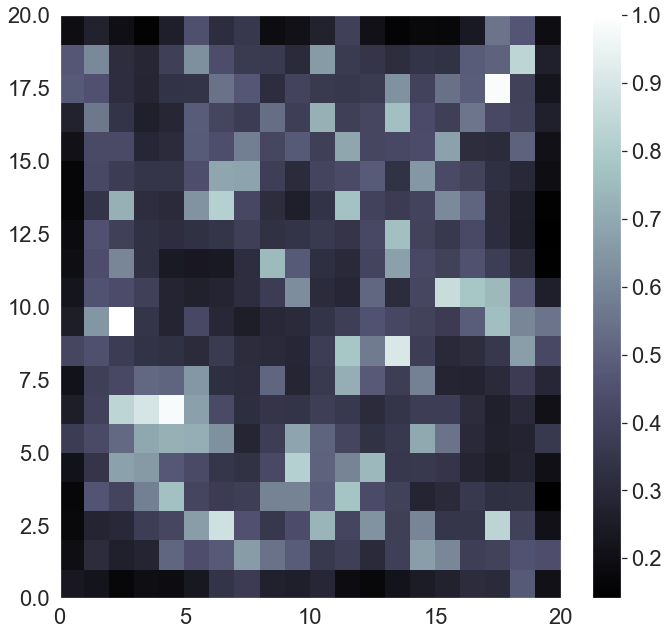

In [83]:
train_df, test_df = train_test_split(data,test_size=0.2,random_state=42)

mm = MinMaxScaler()
train_df = mm.fit_transform(train_df)
test_df = mm.transform(test_df)


pt = PowerTransformer()
train_df = pt.fit_transform(train_df)
test_df = pt.transform(test_df)

plt.rcParams['figure.figsize'] =(10,10)
som = MiniSom(20, 20, input_len=12, sigma = 0.25)
som.train_random(train_df, 10000) 

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(train_df):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
#          markers[y[i]],
#          markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

После обучения сеть преобразует непрерывное входное пространство цветов в дискретную градиентную карту, при подаче одной гаммы цветов всегда будут активироваться нейроны из одной области карты соответствующей данному цвету (активируется один нейрон наиболее подходящий подаваемому вектору). Для демонстрации можно представить вектор синаптических весов нейронов как цветовое градиентное изображение

ЗАКЛЮЧЕНИЕ кластерного анализа

С информацией из кластерного анализа, как компания, выпускающая кредитные карты, мы могли бы тратить больше времени на маркетинговые кампании для нужных людей. Люди в кластерах 0 и 1 явно имеют возможность тратить, и, поскольку они уже тратят, мы могли бы использовать их покупательские привычки, чтобы оптимизировать стратегии, чтобы заставить их тратить еще больше.
Анализ также говорит нам, что у людей из кластера 2 и 3 есть неиспользованный потенциал. Эти люди имеют некоторый баланс, но не покупают так много, при правильном толчке мы могли бы заставить их использовать карту для расходов и стать важными источниками доходов для компании.

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

В данном разделе проведем классификацию, по причине того что в методе самоорганизующихся карт Кохрена нормализацию можно опускать для получения лучшего результата, то сейчас придется провести повторно нормализацию данных и на основе метода K-means определить кластеры и потом провести классификацию при помощи дерева решений

Ранее мы определили что идеальное количество кластеров - 4

In [98]:
data = loadData(FILEPATH)
data.drop(['CUST_ID'], axis=1, inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

z = np.abs(stats.zscore(data))
data_1 = data[(z < 3).all(axis=1)]

#Normalizing
scale = StandardScaler()
X = scale.fit_transform(data_1)
names = data_1.columns
data_2 = pd.DataFrame(X, columns=names)
data_2.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187
5,0.355764,0.517164,0.565801,-0.543505,1.998440,-0.543984,0.456500,-0.668791,0.575234,-0.690806,-0.587319,-0.268390,-0.749257,0.071353,2.343200,-0.531523,0.312187
6,0.364872,0.517164,-0.309081,-0.543505,0.225479,-0.543984,1.297564,-0.668791,1.636530,-0.690806,-0.587319,-0.003826,-0.578941,-0.430590,-0.072205,-0.531523,0.312187
7,-0.167938,0.517164,0.105685,0.290122,-0.241339,-0.543984,-0.384567,-0.379037,-0.273802,-0.690806,-0.587319,-0.466812,1.022039,-0.424176,-0.355671,-0.531523,0.312187
8,-0.736308,-1.613023,0.515400,1.071601,-0.636612,-0.543984,-0.805098,-0.089280,-0.910579,-0.690806,-0.587319,-0.599094,2.384574,-0.092450,-0.628306,-0.531523,0.312187
9,0.015346,0.517164,0.162864,-0.543505,1.181883,-0.543984,1.297564,-0.668791,1.636530,-0.690806,-0.587319,-0.003826,-0.953638,-0.149168,2.041085,-0.531523,0.312187


In [99]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_2)
labels=kmeans.labels_
clusters=pd.concat([data_2, pd.DataFrame({'cluster':labels})], axis=1)

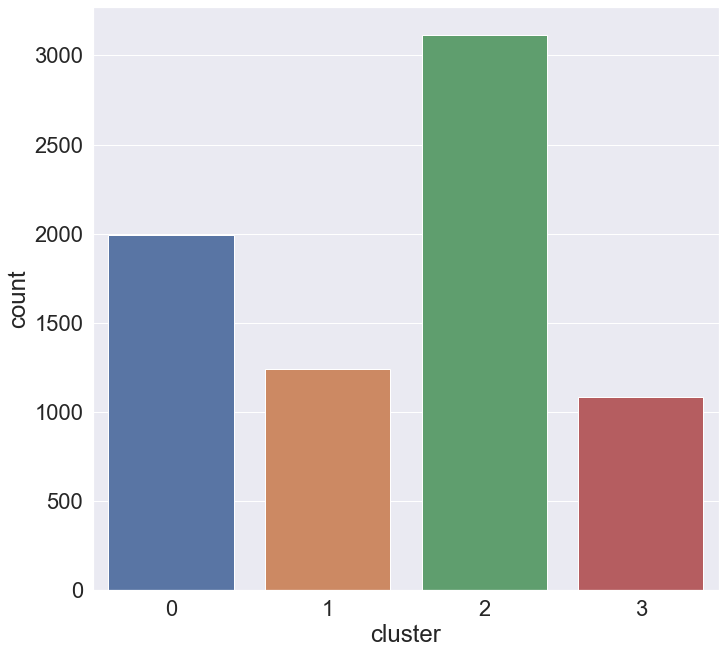

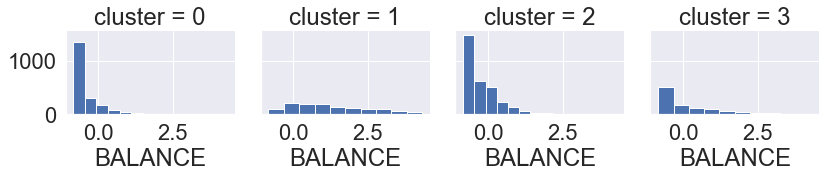

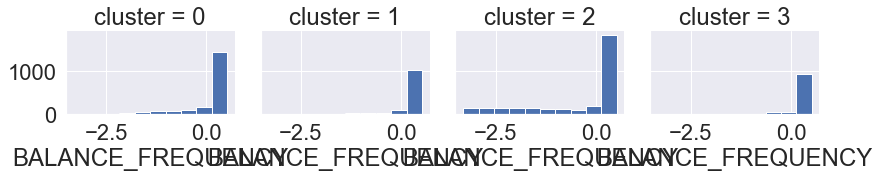

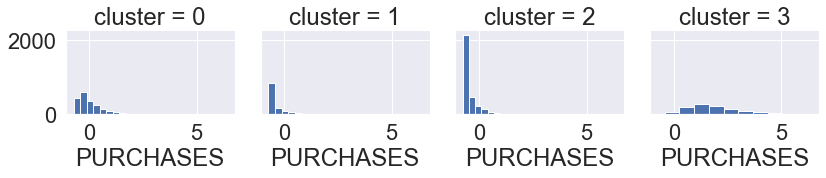

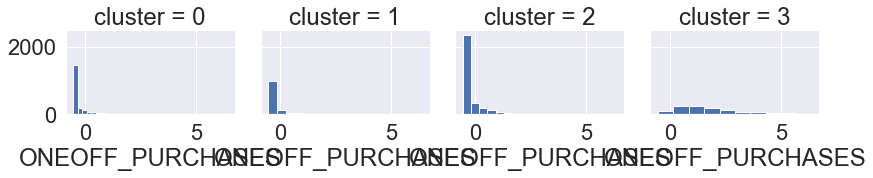

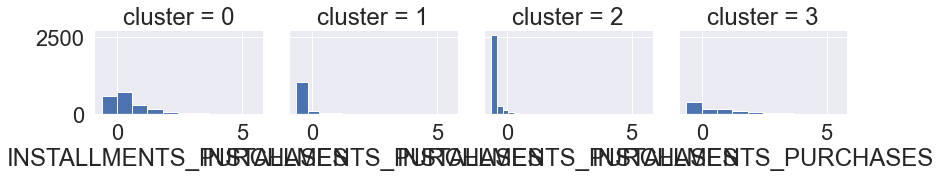

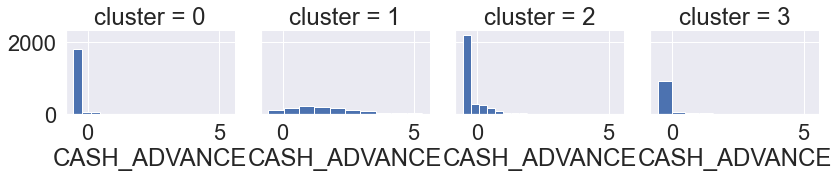

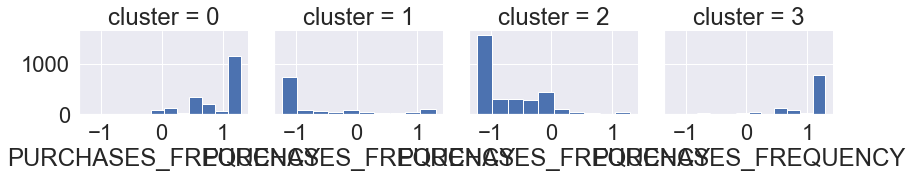

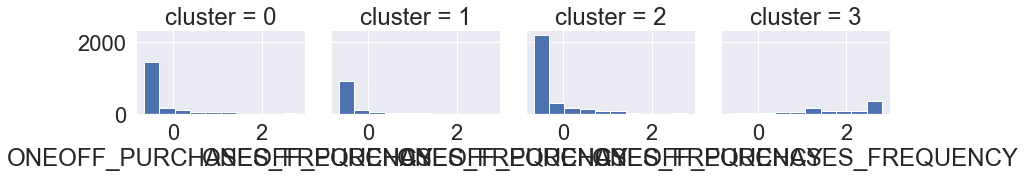

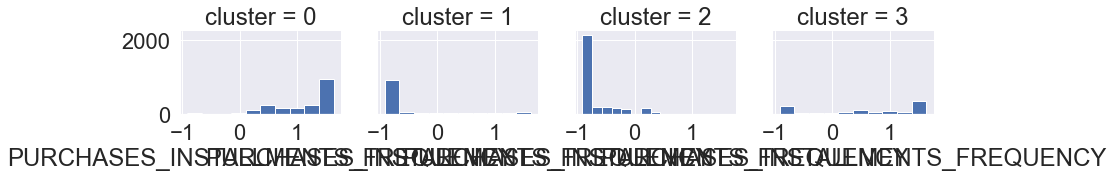

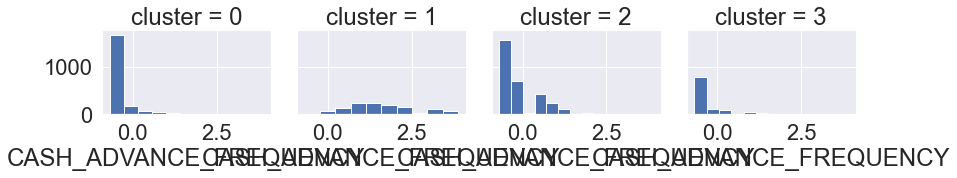

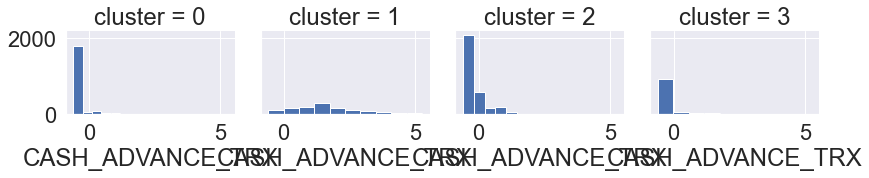

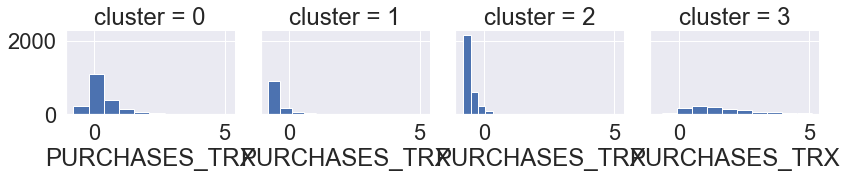

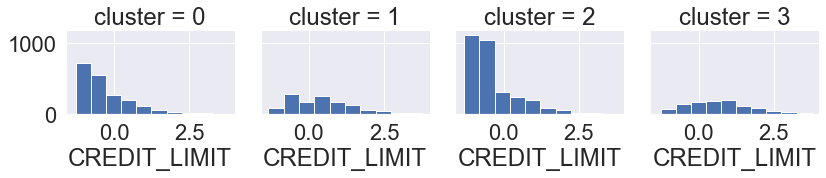

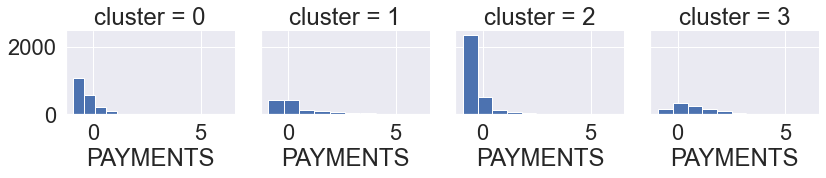

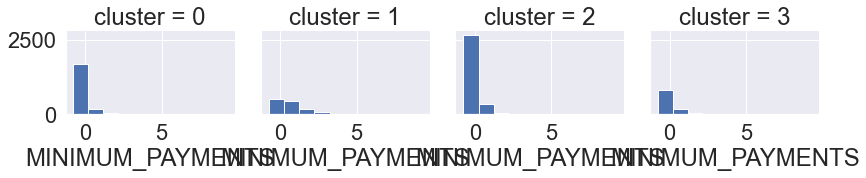

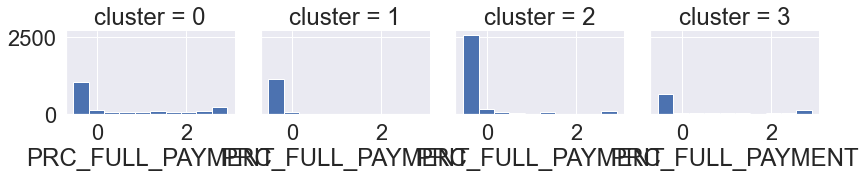

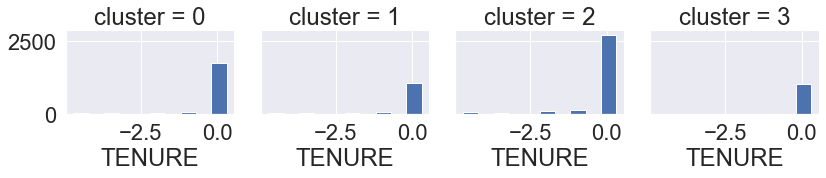

In [100]:
#Visualization
sns.countplot(x='cluster', data=clusters)

for c in data_1:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [101]:
#Split Dataset
X = clusters [['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
y= clusters[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [102]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [103]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[531  11  24  18]
 [  5 327  35   8]
 [ 21  25 890   9]
 [ 30   3  12 282]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       584
           1       0.89      0.87      0.88       375
           2       0.93      0.94      0.93       945
           3       0.89      0.86      0.88       327

    accuracy                           0.91      2231
   macro avg       0.90      0.90      0.90      2231
weighted avg       0.91      0.91      0.91      2231

